In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Import data
data = pd.read_csv("merged_data.csv")
data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,False


In [3]:
#Drop unnecessary columns
data = data.drop(columns="id")
data = data.drop(columns="date")
data.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,False
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,False
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,False
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,False
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,False


In [4]:
#Converting categorical values
data.type = data.type.map(dict(A=0, B=1, C=2, D=3, E=4))
data_dum = pd.get_dummies(data, columns=["family", "city", "state"])
data_dum.head()

,store_nbr,sales,onpromotion,dcoilwtico,type,cluster,holiday,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua
0,1,0.0,0,93.14,3,13,False,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,0,93.14,3,13,False,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.0,0,93.14,3,13,False,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,0,93.14,3,13,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,93.14,3,13,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
#Take part of data
df = data
df = df.iloc[:20000]

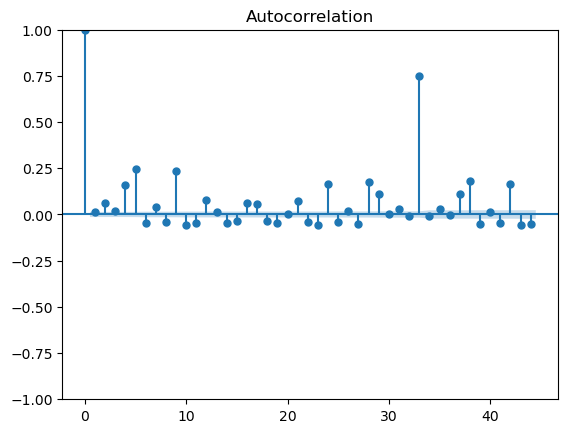

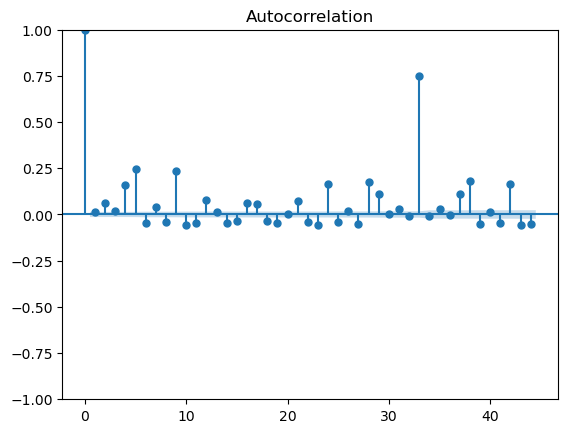

In [6]:
#Check Autocorrelation plot
plot_acf(df.sales)

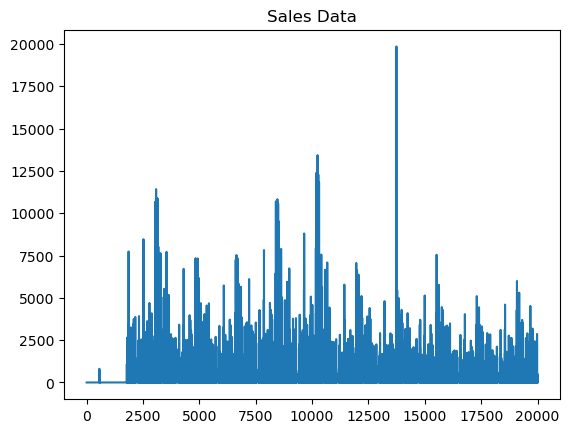

C:\Users\Juhan Pauklin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Juhan Pauklin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                20000
Model:                 ARIMA(5, 2, 1)   Log Likelihood             -158716.744
Date:                Sun, 10 Dec 2023   AIC                         317447.488
Time:                        20:28:29   BIC                         317502.812
Sample:                             0   HQIC                        317465.589
                              - 20000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9306      0.006   -149.477      0.000      -0.943      -0.918
ar.L2         -0.7632      0.008    -95.751      0.000      -0.779      -0.748
ar.L3         -0.6455      0.010    -66.807      0.0

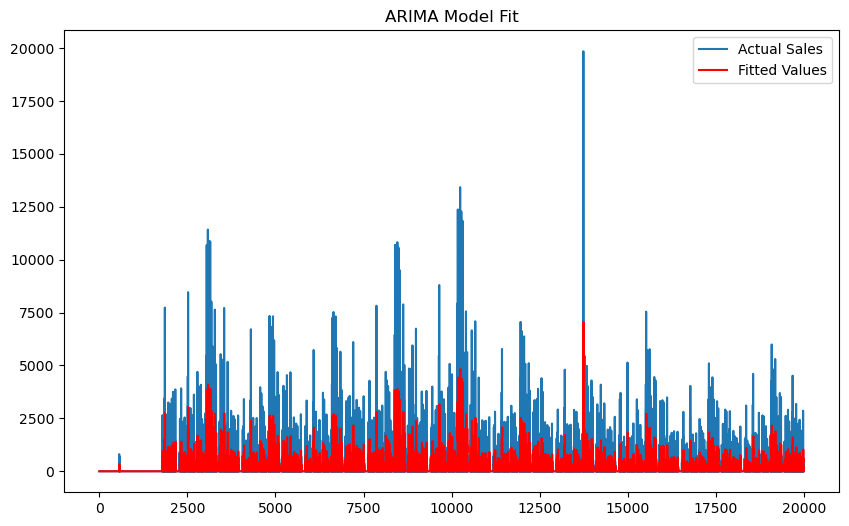

In [7]:
# Plot the time series data
df['sales'].plot(title='Sales Data')
plt.show()

# Define the ARIMA model
# You need to choose appropriate values for p, d, and q based on the ACF and PACF plots
p = 5  # Order of AR component
d = 2  # Order of differencing
q = 1  # Order of MA component
model = ARIMA(df['sales'], order=(p, d, q))

# Fit the model
results = model.fit()

# Display the model summary
print(results.summary())

# Plot the original time series and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()


In [8]:

# Invert differencing to get predictions on the original scale
predictions_diff = pd.Series(results.fittedvalues, copy=True)
predictions_diff_cumsum = predictions_diff.cumsum()
predictions = pd.Series(df['sales'].iloc[0], index=df.index)
predictions = predictions.add(predictions_diff_cumsum, fill_value=0)

# Extract the actual values
actual_values = df['sales']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2225041.7599084126
